# **Predictive Analysis on House Prices**
**Description:** Imagine having the power to predict the selling price of a house based on various features such as its size, location, and amenities. In this exciting project, you will delve into the world of real estate data analysis and prediction. Using Python and machine learning, you'll explore a comprehensive dataset containing information about different houses and their selling prices. You'll learn to preprocess the data, visualize the relationships between different features and prices, and then build a predictive model that can estimate house prices based on input parameters. By completing this project, you'll gain valuable skills in data preprocessing, feature engineering, and regression modeling, which are essential in the field of data science and predictive analytics.

**Import Libraries**

In [1]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Loading and Viewing Raw Data**

In [2]:
# Loading the data
df = pd.read_csv("https://raw.githubusercontent.com/JasonW35214/NYU-DataScience-Bootcamp-2023/main/Housing.csv")

In [3]:
# View first ten rows of dataset
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


**Pre-process Data**

In [4]:
# Encode binary variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
  df[col] = df[col].replace(to_replace=['yes'], value=1)
  df[col] = df[col].replace(to_replace=['no'], value=0)

# Encode categorical variables
categorical_cols = ['furnishingstatus']
df_encoded = pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus')
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('furnishingstatus', axis=1)

In [5]:
# View first ten rows of updated dataset
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


Text(0, 0.5, 'Density')

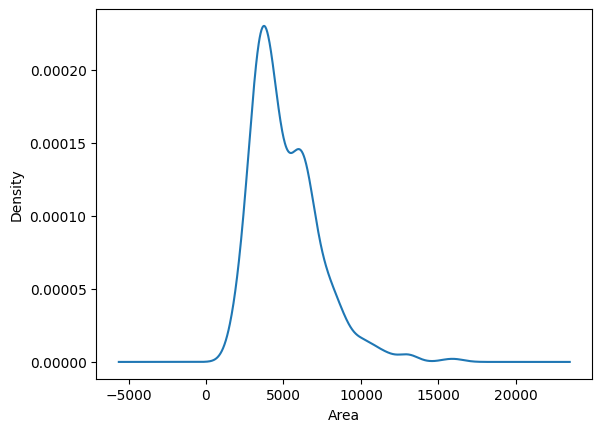

In [6]:
# Visualize 'area' column data
df['area'].plot(kind='density')
plt.xlabel('Area')
plt.ylabel('Density')

In [7]:
# Initialize StandardScaler
scaler = StandardScaler()

# Prepare column for scaling
area_col = np.array(df['area']).reshape(-1, 1)

# Apply z-score normalization on 'area' column
scaler.fit(area_col)
df['area_scaled'] = scaler.transform(area_col)

# Drop original 'area' column from dataframe
df = df.drop('area', axis=1)

In [8]:
# View first ten rows of updated dataset
df.head(10)

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_scaled
0,13300000,4,2,3,1,0,0,0,1,2,1,1,0,0,1.046726
1,12250000,4,4,4,1,0,0,0,1,3,0,1,0,0,1.757010
2,12250000,3,2,2,1,0,1,0,0,2,1,0,1,0,2.218232
3,12215000,4,2,2,1,0,1,0,1,3,1,1,0,0,1.083624
4,11410000,4,1,2,1,1,1,0,1,2,0,1,0,0,1.046726
5,10850000,3,3,1,1,0,1,0,1,2,1,0,1,0,1.083624
6,10150000,4,3,4,1,0,0,0,1,2,1,0,1,0,1.581745
7,10150000,5,3,2,1,0,0,0,0,0,0,0,0,1,5.096263
8,9870000,4,1,2,1,1,1,0,1,2,1,1,0,0,1.360358
9,9800000,3,2,4,1,1,0,0,1,1,1,0,0,1,0.276484


**Data Visualization**

<Axes: >

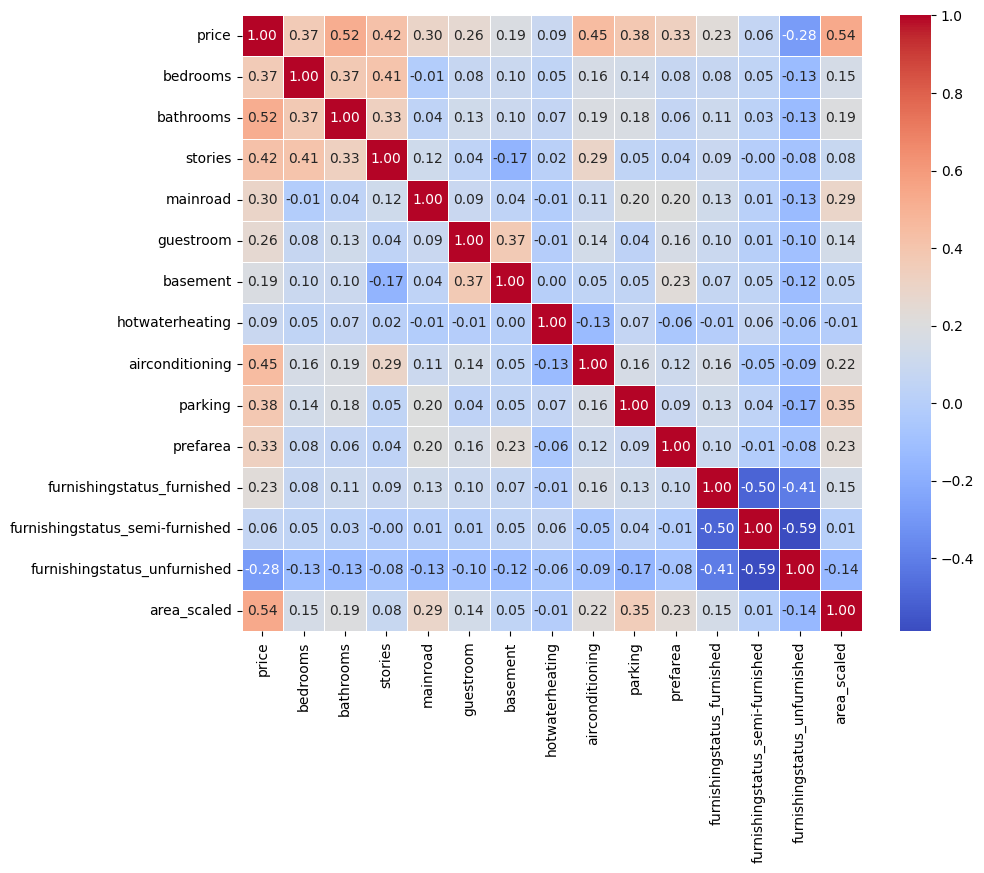

In [9]:
# View correlations between features using a correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

**Create the Model**

In [10]:
# Set the response variable
y = np.array(df['price'])

# Set predictor variables
X = np.array(df.drop(columns=['price']))

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
# Create and fit linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# View weights and bias
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [ 196427.92718503  968809.34383607  413696.27182958  431129.15616554
  533772.31650583  245108.7346844   569344.00266367  891395.61434769
  204221.12076344  649079.15231532  173107.8285232    56501.41892686
 -229609.24745006  547281.62190993]
Intercept:  1075119.5181181137


In [12]:
# Compute training predictions
ytr_pred = reg.predict(X_train)

# Compute Training Mean Abolute Error and Mean Square error from train data
print("Training Mean Absolute Error: ", mean_absolute_error(y_train,ytr_pred))
print("Training Mean Squared Error: ", mean_squared_error(y_train,ytr_pred)**0.5)

Training Mean Absolute Error:  740397.8194388967
Training Mean Squared Error:  992221.210440459


In [13]:
# Compute test predictions
yts_pred = reg.predict(X_test)

# Compute Mean Abolute Error and Mean Square error from test data
print("Test Mean Absolute Error: ", mean_absolute_error(y_test,yts_pred))
print("Test Mean Squared Error: ", mean_squared_error(y_test,yts_pred)**0.5)

Test Mean Absolute Error:  864455.5538211975
Test Mean Squared Error:  1195001.8990490371


Text(0, 0.5, 'Predicted Test Values')

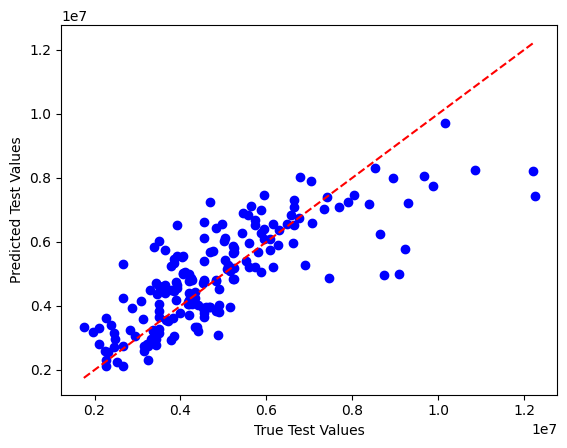

In [14]:
# Visualize Test predictions
plt.scatter(y_test, yts_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red') # Line of perfect fit
plt.xlabel('True Test Values')
plt.ylabel('Predicted Test Values')